# MNIST Digit Recognition Project:

## Import Libraries

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import gradio as gr
import cv2

##  (a) Load MNIST dataset

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

C:\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


 ## (b) Split data (60k train, 10k test)

In [3]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

##  (c) Train classifiers:

###  SGD Classifier (with hinge loss)

In [5]:
sgd_clf = make_pipeline(
    StandardScaler(),
    SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=42)
)
sgd_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=42))])

### Random Forest Classifier

In [6]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

##  (d) Evaluate using confusion matrix & classification report 

In [7]:
print("SGD Classifier Evaluation:")
y_pred_sgd = sgd_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_sgd))

SGD Classifier Evaluation:
[[ 937    0    0    0    0    3    4    1   35    0]
 [   0 1083    5    1    0    3    4    0   39    0]
 [   4    3  890   14    7    2   13    6   89    4]
 [   4    0   13  874    0   20    2    7   82    8]
 [   1    0    6    0  877    1    6    4   66   21]
 [   5    2    1   31    8  716   17    7   98    7]
 [  10    2   10    0    8   13  881    1   33    0]
 [   2    2   16    5    5    1    0  924   49   24]
 [   6    4    4   15    3   24    8    1  905    4]
 [   5    5    0    6   24    4    0   21   98  846]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       980
           1       0.98      0.95      0.97      1135
           2       0.94      0.86      0.90      1032
           3       0.92      0.87      0.89      1010
           4       0.94      0.89      0.92       982
           5       0.91      0.80      0.85       892
           6       0.94      0.92      0.93       958
         

In [8]:
print("Random Forest Classifier Evaluation:")
y_pred_rf = rf_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Evaluation:
[[ 971    0    0    0    0    2    3    1    3    0]
 [   0 1127    2    2    0    1    2    0    1    0]
 [   6    0 1002    5    3    0    3    8    5    0]
 [   1    0    9  972    0    9    0    9    8    2]
 [   1    0    0    0  955    0    5    1    4   16]
 [   5    1    1    9    2  860    5    2    5    2]
 [   7    3    0    0    3    3  937    0    5    0]
 [   1    4   20    2    0    0    0  990    2    9]
 [   4    0    6    7    5    5    5    4  930    8]
 [   7    6    2   12   12    1    0    4    4  961]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958

## (e) Visualize errors (plot worst misclassifications)

Showing 5 worst misclassifications:


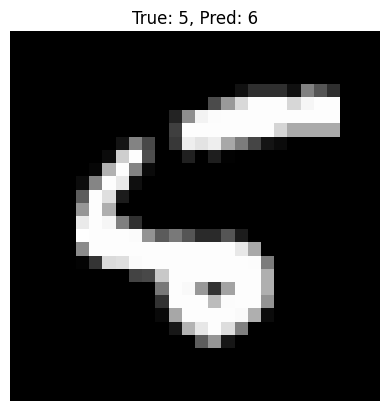

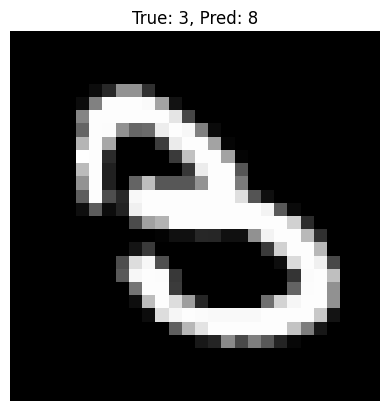

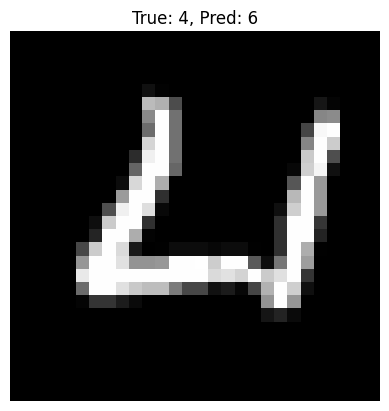

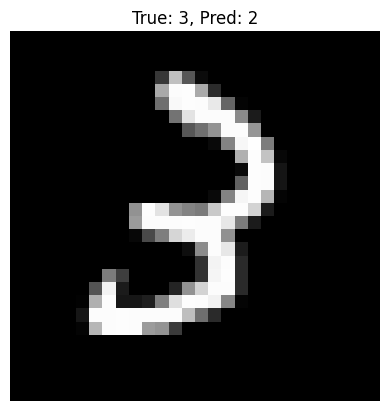

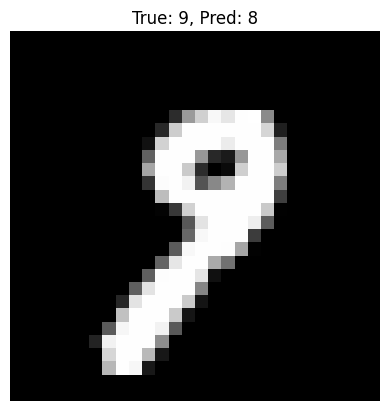

In [10]:
errors = (y_pred_sgd != y_test)
X_errors = X_test[errors]
y_pred_errors = y_pred_sgd[errors]
y_true_errors = y_test[errors]

print("Showing 5 worst misclassifications:")
for i in range(5):
    image = X_errors[i].reshape(28, 28)
    plt.imshow(image, cmap="gray")
    plt.title(f"True: {y_true_errors[i]}, Pred: {y_pred_errors[i]}")
    plt.axis("off")
    plt.show()

##  (f) Deploy as Gradio web app

In [29]:
import gradio as gr
import cv2
import numpy as np

digit_names = {
    0: "Zero", 1: "One", 2: "Two", 3: "Three",
    4: "Four", 5: "Five", 6: "Six", 7: "Seven",
    8: "Eight", 9: "Nine"
}

def predict_digit(editor_value):
    if editor_value is None:
        return "Draw a digit!"
    image = editor_value["composite"]  # a numpy array
    img = cv2.resize(image, (28, 28))
    img = img.mean(axis=2)
    img = 255 - img
    img = img.reshape(1, -1)
    pred = rf_clf.predict(img)[0]
    return digit_names.get(pred, str(pred))

with gr.Blocks() as demo:
    gr.Markdown("## Draw a digit below:")
    inp = gr.ImageEditor(interactive=True, type="numpy")
    btn = gr.Button("Predict")
    out = gr.Textbox(label="Predicted Digit")
    btn.click(fn=predict_digit, inputs=inp, outputs=out)

demo.launch()


* Running on local URL:  http://127.0.0.1:7868
* To create a public link, set `share=True` in `launch()`.


## Mist Digit Classifier

Launch the app by clicking the URL.
Draw or upload a digit. 
The output will be the predicted digit.